#Task 8
##Clustering with K-Means





##Objective: Perform unsupervised learning with K-Means clustering.



##Importing Libraries and Loading Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files

In [4]:
# Load data
df = pd.read_csv('/content/Mall_Customers.csv')


##Initial Data Exploration

In [5]:
# Display the first few rows of the dataset
print(df.head())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Get basic statistics of the dataset
print(df.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

##Normalize features

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##Elbow Method to find optimal K

In [10]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


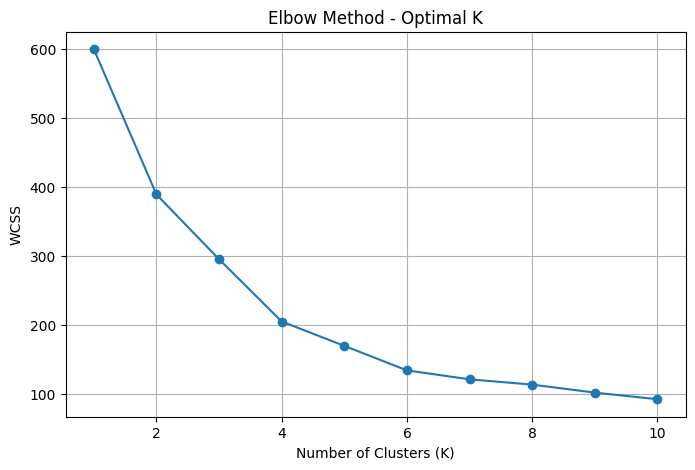

In [11]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

##Fit KMeans with optimal K

In [12]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)


##Evaluate with Silhouette Score

In [13]:
sil_score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.2f}")

Silhouette Score for K=5: 0.41


## Visualize Clusters using PCA

In [14]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)


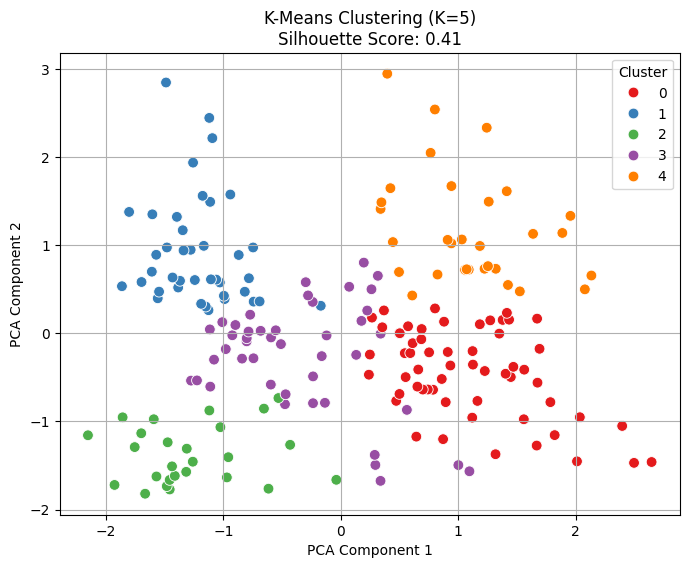

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette='Set1', s=60)
plt.title(f'K-Means Clustering (K={optimal_k})\nSilhouette Score: {sil_score:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()